<a href="https://colab.research.google.com/github/thallyson1997/Anotador-Funcional-Proteico/blob/main/anotador_proteico_colab_antismash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anotador Proteico - Google Colab (antiSMASH Edition)

Este notebook identifica e analisa proteínas hipotéticas em **agrupamentos gênicos de metabólitos secundários** (BGCs) identificados pelo antiSMASH.

## Objetivo
Encontrar proteínas hipotéticas **dentro de clusters de biossíntese** e anotar suas funções por similaridade, mantendo o contexto do tipo de cluster (PKS, NRPS, terpenos, etc.).

## 🧬 Metodologia
1. **antiSMASH** identifica BGCs (Biosynthetic Gene Clusters) no genoma
2. **Este notebook** extrai proteínas hipotéticas dos clusters

3. **Relatórios** contextualizados por tipo de cluster - Opção de conectar ao Google Drive para salvar resultados

- Usa armazenamento temporário do Colab

## 🚀 Otimizado para Google Colab - Aceita resultados do antiSMASH (arquivos .regionXXX.gbk ou JSON)


## 0. Configuração Inicial do Google Colab

Execute esta seção primeiro para configurar o ambiente Colab.

In [1]:
# Instalar dependências necessárias
print("=" * 70)
print("CONFIGURANDO AMBIENTE GOOGLE COLAB")
print("=" * 70)

# Instalar Biopython
print("\n📦 Instalando Biopython...")
!pip install -q biopython

print("\n✅ Ambiente configurado com sucesso!")
print("=" * 70)

CONFIGURANDO AMBIENTE GOOGLE COLAB

📦 Instalando Biopython...

✅ Ambiente configurado com sucesso!


In [2]:
# (OPCIONAL) Montar Google Drive para salvar resultados permanentemente
from google.colab import drive
import os

montar_drive = input("Deseja montar o Google Drive para salvar resultados? (s/n): ").strip().lower()

if montar_drive == 's':
    print("\n📁 Montando Google Drive...")
    drive.mount('/content/drive')

    # Criar pasta para o projeto no Drive
    project_dir = '/content/drive/MyDrive/Anotador_Proteico'
    os.makedirs(project_dir, exist_ok=True)
    os.chdir(project_dir)
    print(f"✅ Diretório de trabalho: {project_dir}")
    print("📝 Todos os arquivos serão salvos no seu Google Drive")
else:
    # Usar armazenamento temporário do Colab
    os.chdir('/content')
    print("📝 Usando armazenamento temporário do Colab")
    print("⚠️  Arquivos serão perdidos ao desconectar da sessão")

# Criar pastas necessárias
os.makedirs('dados', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
print("✅ Pastas criadas: dados/ e outputs/")

Deseja montar o Google Drive para salvar resultados? (s/n): s

📁 Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Diretório de trabalho: /content/drive/MyDrive/Anotador_Proteico
📝 Todos os arquivos serão salvos no seu Google Drive
✅ Pastas criadas: dados/ e outputs/


## 1. Upload dos Resultados do antiSMASH

### 📋 Pré-requisito: Executar antiSMASH

Antes de usar este notebook, você precisa rodar o antiSMASH no seu genoma:

1. **antiSMASH Web** (recomendado): https://antismash.secondarymetabolites.org/

   - Upload do seu genoma (FASTA ou GenBank)
   - Aguarde o processamento (pode demorar)
   - Baixe os resultados completos (ZIP)

├── meu_genoma.region001.gbk    # Cluster BGC 1
├── meu_genoma.region002.gbk    # Cluster BGC 2
├── ...                         # Outros clusters
├── meu_genoma.json             # Dados estruturados (preferencial)

2. **antiSMASH Local** (se instalado):
   antismash meu_genoma.gbk --output-dir antismash_results

### 📁 Estrutura esperada dos resultados:

### 📤 Upload dos resultados:
- **Opção 1**: Upload do arquivo ZIP dos resultados antiSMASH
- **Opção 2**: Upload manual dos arquivos .regionXXX.gbk (pasta dados/)
- **Opção 3**: Se montou o Drive, copie a pasta de resultados para `MyDrive/Anotador_Proteico/dados/antismash_output/`

Faça upload usando uma das opções acima.

In [3]:
from google.colab import files
import os
import zipfile
import glob

# Diretório para resultados antiSMASH
antismash_dir = "dados/antismash_output"
os.makedirs(antismash_dir, exist_ok=True)

# Verificar se já existem arquivos do antiSMASH
region_files = glob.glob(f"{antismash_dir}/*.region*.gbk")
json_files = glob.glob(f"{antismash_dir}/*.json")

if region_files or json_files:
    print(f"✅ Resultados do antiSMASH já existem em: {antismash_dir}")
    print(f"   Arquivos de região (BGCs): {len(region_files)}")
    print(f"   Arquivos JSON: {len(json_files)}")
    print("\n📋 Arquivos encontrados:")
    for f in sorted(region_files[:5]):  # Mostrar primeiros 5
        print(f"   - {os.path.basename(f)}")
    if len(region_files) > 5:
        print(f"   ... e mais {len(region_files) - 5} arquivos")
else:
    print("="*70)
    print("UPLOAD DOS RESULTADOS DO antiSMASH")
    print("="*70)

    print("\n📤 Escolha o arquivo ZIP dos resultados do antiSMASH")
    print("   (Baixado do servidor web ou gerado localmente)\n")

    uploaded = files.upload()

    if uploaded:
        zip_filename = list(uploaded.keys())[0]

        # Verificar se é ZIP
        if zip_filename.endswith('.zip'):
            print(f"\n🔄 Extraindo {zip_filename}...")

            with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
                zip_ref.extractall(antismash_dir)

            print(f"✅ Arquivos extraídos em: {antismash_dir}")

            # Remover ZIP
            os.remove(zip_filename)

            # Verificar arquivos extraídos
            region_files = glob.glob(f"{antismash_dir}/**/*.region*.gbk", recursive=True)
            json_files = glob.glob(f"{antismash_dir}/**/*.json", recursive=True)

            print(f"\n📊 Resultados encontrados:")
            print(f"   Arquivos de região (BGCs): {len(region_files)}")
            print(f"   Arquivos JSON: {len(json_files)}")

            if not region_files and not json_files:
                print("\n⚠️  AVISO: Nenhum arquivo .region*.gbk ou .json encontrado!")
                print("   Verifique se o ZIP contém os resultados corretos do antiSMASH")

        # Upload direto de arquivo individual
        elif zip_filename.endswith('.gbk') or zip_filename.endswith('.json'):
            dest_path = os.path.join(antismash_dir, zip_filename)
            os.rename(zip_filename, dest_path)

            print(f"✅ Arquivo movido para: {dest_path}")
            file_size = os.path.getsize(dest_path) / (1024**2)
            print(f"   Tamanho: {file_size:.2f} MB")

        else:
            print(f"❌ Formato não reconhecido: {zip_filename}")
            print("   Esperado: .zip, .gbk ou .json")

    else:
        print("❌ Nenhum arquivo foi enviado")

✅ Resultados do antiSMASH já existem em: dados/antismash_output
   Arquivos de região (BGCs): 17
   Arquivos JSON: 1

📋 Arquivos encontrados:
   - NZ_JBALCJ010000005.1.region001.gbk
   - NZ_JBALCJ010000006.1.region001.gbk
   - NZ_JBALCJ010000007.1.region001.gbk
   - NZ_JBALCJ010000007.1.region002.gbk
   - NZ_JBALCJ010000010.1.region001.gbk
   ... e mais 12 arquivos


## 2. Análise e Carregamento dos Resultados antiSMASH

Agora vamos processar os arquivos do antiSMASH para extrair informações sobre os clusters BGC e suas proteínas.

In [4]:
from Bio import SeqIO
import pandas as pd
import os
import glob
import json

antismash_dir = "dados/antismash_output"

print("="*70)
print("ANÁLISE DOS RESULTADOS DO antiSMASH")
print("="*70)

# Procurar arquivos de região BGC
region_files = glob.glob(f"{antismash_dir}/**/*.region*.gbk", recursive=True)
json_files = glob.glob(f"{antismash_dir}/**/*.json", recursive=True)

print(f"\n📊 Arquivos encontrados:")
print(f"   Regiões BGC (*.region*.gbk): {len(region_files)}")
print(f"   Arquivos JSON: {len(json_files)}")

if not region_files and not json_files:
    print("\n❌ Nenhum arquivo do antiSMASH encontrado!")
    print("   Execute a célula anterior para fazer upload dos resultados")
    bgc_data = None
else:
    # Estrutura para armazenar dados dos clusters
    bgc_data = []

    if region_files:
        print(f"\n🔄 Processando {len(region_files)} arquivos de região BGC...")

        for region_file in sorted(region_files):
            region_name = os.path.basename(region_file)

            # Extrair número da região
            import re
            match = re.search(r'region(\d+)', region_name)
            region_num = int(match.group(1)) if match else 0

            # Parsear arquivo GenBank da região
            try:
                for record in SeqIO.parse(region_file, "genbank"):
                    # Procurar informações do cluster nas features
                    cluster_type = "Unknown"

                    for feature in record.features:
                        if feature.type == "region":
                            # Extrair tipo do cluster
                            product = feature.qualifiers.get('product', ['Unknown'])[0]
                            cluster_type = product
                            break

                    bgc_info = {
                        'region_file': region_name,
                        'region_number': region_num,
                        'cluster_type': cluster_type,
                        'record_id': record.id,
                        'record': record
                    }
                    bgc_data.append(bgc_info)

                    print(f"   ✓ {region_name}: {cluster_type}")

            except Exception as e:
                print(f"   ⚠️  Erro ao processar {region_name}: {e}")

        print(f"\n✅ {len(bgc_data)} regiões BGC carregadas com sucesso!")

        # Estatísticas dos tipos de clusters
        if bgc_data:
            cluster_types = {}
            for bgc in bgc_data:
                ct = bgc['cluster_type']
                cluster_types[ct] = cluster_types.get(ct, 0) + 1

            print(f"\n📊 Distribuição dos tipos de clusters:")
            for ct, count in sorted(cluster_types.items(), key=lambda x: x[1], reverse=True):
                print(f"   {ct}: {count}")

    elif json_files:
        print("\n🔄 Processando arquivo JSON do antiSMASH...")
        # Implementação alternativa usando JSON será feita se necessário
        print("   ⚠️  Processamento via JSON ainda não implementado")
        print("   Use os arquivos .region*.gbk se possível")

ANÁLISE DOS RESULTADOS DO antiSMASH

📊 Arquivos encontrados:
   Regiões BGC (*.region*.gbk): 17
   Arquivos JSON: 1

🔄 Processando 17 arquivos de região BGC...
   ✓ NZ_JBALCJ010000005.1.region001.gbk: T1PKS
   ✓ NZ_JBALCJ010000006.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000007.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000007.1.region002.gbk: NRPS
   ✓ NZ_JBALCJ010000010.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000010.1.region002.gbk: terpene
   ✓ NZ_JBALCJ010000013.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000014.1.region001.gbk: hglE-KS
   ✓ NZ_JBALCJ010000014.1.region002.gbk: thioamitides
   ✓ NZ_JBALCJ010000019.1.region001.gbk: terpene-precursor
   ✓ NZ_JBALCJ010000028.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000029.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000033.1.region001.gbk: crocagin
   ✓ NZ_JBALCJ010000034.1.region001.gbk: microviridin
   ✓ NZ_JBALCJ010000034.1.region002.gbk: NRPS
   ✓ NZ_JBALCJ010000036.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000042.1.region001.gbk: terpene

✅ 17 

## 2.1 Função de Identificação de Proteínas Hipotéticas

Esta função verifica se uma feature (característica) do genoma é uma proteína hipotética, procurando pela expressão "hypothetical protein" nos campos `product` e `note`.

In [5]:
def is_hypothetical_protein(feature):
    if 'product' in feature.qualifiers:
        for product in feature.qualifiers['product']:
            if 'hypothetical protein' in product.lower():
                return True

    if 'note' in feature.qualifiers:
        for note in feature.qualifiers['note']:
            if 'hypothetical protein' in note.lower():
                return True

    return False

## 3. Extração de Proteínas Hipotéticas dos Clusters BGC

Agora vamos extrair **apenas as proteínas hipotéticas que estão dentro dos clusters de metabólitos secundários**, mantendo o contexto do tipo de cluster ao qual pertencem.

In [6]:
# Criar pasta outputs se não existir
os.makedirs("outputs", exist_ok=True)

# Lista para armazenar os dados das proteínas hipotéticas
proteinas_hipoteticas = []

if bgc_data:
    print("="*70)
    print("EXTRAÇÃO DE PROTEÍNAS HIPOTÉTICAS DOS CLUSTERS BGC")
    print("="*70)

    # Abrir arquivo de log .txt
    with open("outputs/output_log.txt", "w") as log_file:
        contador = 0

        # Processar cada região BGC
        for bgc in bgc_data:
            region_file = bgc['region_file']
            region_num = bgc['region_number']
            cluster_type = bgc['cluster_type']
            record = bgc['record']

            log_file.write(f"\n{'='*70}\n")
            log_file.write(f"REGIÃO {region_num}: {region_file}\n")
            log_file.write(f"Tipo de cluster: {cluster_type}\n")
            log_file.write(f"{'='*70}\n\n")

            # Processar features (genes) do record
            for feature in record.features:
                if feature.type == "CDS":
                    if is_hypothetical_protein(feature):
                        contador += 1

                        # Escrever no log
                        print(f"Proteína Hipotética #{contador}: Região {region_num} ({cluster_type})")

                        log_file.write(f"Proteína Hipotética de número: {contador}\n")
                        log_file.write(f"Região BGC: {region_num}\n")
                        log_file.write(f"Tipo de cluster: {cluster_type}\n")
                        log_file.write(f"Record ID: {record.id}\n")
                        log_file.write(f"Feature: {feature}\n")
                        log_file.write("This feature is a hypothetical protein.\n\n")

                        # Coletar dados para o CSV
                        proteina_data = {
                            'Numero': contador,
                            'BGC_Region': region_num,
                            'BGC_Cluster_Type': cluster_type,
                            'BGC_Region_File': region_file,
                            'Record_ID': record.id,
                            'Start': int(feature.location.start) if feature.location else None,
                            'End': int(feature.location.end) if feature.location else None,
                            'Strand': feature.location.strand if feature.location else None,
                            'Product': feature.qualifiers.get('product', [''])[0],
                            'Locus_Tag': feature.qualifiers.get('locus_tag', [''])[0],
                            'Protein_ID': feature.qualifiers.get('protein_id', [''])[0],
                            'Translation': feature.qualifiers.get('translation', [''])[0] if 'translation' in feature.qualifiers else '',
                            'Note': '; '.join(feature.qualifiers.get('note', []))
                        }
                        proteinas_hipoteticas.append(proteina_data)

    # Criar DataFrame e salvar como CSV
    df = pd.DataFrame(proteinas_hipoteticas)

    # Criar coluna FASTA_ID que será usada no merge com DIAMOND
    # (corresponde ao ID usado no arquivo FASTA)
    df['FASTA_ID'] = df.apply(
        lambda row: row['Protein_ID'] if row['Protein_ID'] else f"hyp_{row['Numero']}",
        axis=1
    )

    df.to_csv('outputs/proteinas_hipoteticas.csv', index=False, encoding='utf-8')

    print(f"\n{'='*70}")
    print(f"✅ Total de proteínas hipotéticas encontradas: {contador}")
    print(f"📁 Dados salvos em:")
    print(f"   - outputs/output_log.txt")
    print(f"   - outputs/proteinas_hipoteticas.csv")

    # Estatísticas por tipo de cluster
    if contador > 0:
        print(f"\n📊 Distribuição por tipo de cluster BGC:")
        cluster_counts = df['BGC_Cluster_Type'].value_counts()
        for cluster, count in cluster_counts.items():
            print(f"   {cluster}: {count} proteínas hipotéticas ({count/contador*100:.1f}%)")

    print(f"{'='*70}")

else:
    print("❌ Nenhum dado BGC disponível. Execute as células anteriores.")
    df = pd.DataFrame()

EXTRAÇÃO DE PROTEÍNAS HIPOTÉTICAS DOS CLUSTERS BGC
Proteína Hipotética #1: Região 1 (T1PKS)
Proteína Hipotética #2: Região 1 (T1PKS)
Proteína Hipotética #3: Região 1 (T1PKS)
Proteína Hipotética #4: Região 1 (T1PKS)
Proteína Hipotética #5: Região 1 (T1PKS)
Proteína Hipotética #6: Região 1 (T1PKS)
Proteína Hipotética #7: Região 1 (T1PKS)
Proteína Hipotética #8: Região 1 (T1PKS)
Proteína Hipotética #9: Região 1 (NRPS)
Proteína Hipotética #10: Região 1 (NRPS)
Proteína Hipotética #11: Região 1 (NRPS)
Proteína Hipotética #12: Região 1 (NRPS)
Proteína Hipotética #13: Região 1 (NRPS)
Proteína Hipotética #14: Região 1 (NRPS)
Proteína Hipotética #15: Região 1 (NRPS)
Proteína Hipotética #16: Região 1 (NRPS)
Proteína Hipotética #17: Região 1 (NRPS)
Proteína Hipotética #18: Região 1 (NRPS)
Proteína Hipotética #19: Região 1 (NRPS)
Proteína Hipotética #20: Região 1 (NRPS)
Proteína Hipotética #21: Região 1 (NRPS)
Proteína Hipotética #22: Região 1 (terpene)
Proteína Hipotética #23: Região 1 (terpene)
P

## 3.1 Diagnóstico: Verificação de IDs

**IMPORTANTE**: Arquivos do antiSMASH frequentemente não têm `protein_id`. Vamos verificar:

In [7]:
# Diagnóstico: Verificar IDs das proteínas
if len(df) > 0:
    print("="*70)
    print("DIAGNÓSTICO: VERIFICAÇÃO DE IDs")
    print("="*70)

    # Contar proteínas com/sem protein_id
    com_protein_id = df['Protein_ID'].notna() & (df['Protein_ID'] != '')
    sem_protein_id = ~com_protein_id

    print(f"\n📊 Distribuição de IDs:")
    print(f"   Com protein_id: {com_protein_id.sum()}")
    print(f"   Sem protein_id: {sem_protein_id.sum()}")

    # Mostrar exemplos de ambos os casos
    if com_protein_id.sum() > 0:
        print(f"\n✅ Exemplos com protein_id:")
        exemplos_com = df[com_protein_id][['Numero', 'Protein_ID', 'FASTA_ID']].head(3)
        for _, row in exemplos_com.iterrows():
            print(f"   #{row['Numero']}: {row['Protein_ID']} → FASTA_ID: {row['FASTA_ID']}")

    if sem_protein_id.sum() > 0:
        print(f"\n⚠️  Exemplos SEM protein_id (IDs gerados):")
        exemplos_sem = df[sem_protein_id][['Numero', 'Protein_ID', 'FASTA_ID']].head(3)
        for _, row in exemplos_sem.iterrows():
            print(f"   #{row['Numero']}: '{row['Protein_ID']}' → FASTA_ID: {row['FASTA_ID']}")

    print(f"\n💡 Interpretação:")
    if sem_protein_id.sum() > 0:
        print(f"   ⚠️  {sem_protein_id.sum()} proteínas não têm protein_id nos arquivos antiSMASH")
        print(f"   ✅ IDs alternativos foram gerados (hyp_1, hyp_2, etc.)")
        print(f"   ✅ A coluna FASTA_ID será usada para identificação única nas análises seguintes.")
    else:
        print(f"   ✅ Todas as proteínas têm protein_id nos arquivos")

    print("="*70)
else:
    print("⚠️  DataFrame vazio. Execute as células anteriores.")

DIAGNÓSTICO: VERIFICAÇÃO DE IDs

📊 Distribuição de IDs:
   Com protein_id: 99
   Sem protein_id: 3

✅ Exemplos com protein_id:
   #1: WP_334920721.1 → FASTA_ID: WP_334920721.1
   #2: WP_334920723.1 → FASTA_ID: WP_334920723.1
   #3: WP_334843764.1 → FASTA_ID: WP_334843764.1

⚠️  Exemplos SEM protein_id (IDs gerados):
   #7: '' → FASTA_ID: hyp_7
   #50: '' → FASTA_ID: hyp_50
   #95: '' → FASTA_ID: hyp_95

💡 Interpretação:
   ⚠️  3 proteínas não têm protein_id nos arquivos antiSMASH
   ✅ IDs alternativos foram gerados (hyp_1, hyp_2, etc.)
   ✅ A coluna FASTA_ID será usada para identificação única nas análises seguintes.


## 4. Predição de Domínios Conservados e Famílias Proteicas

**IMPORTANTE**: Este teste está sendo realizado com sequências multi-proteicas de um **líchen** (simbiose fungi-alga). Liquens possuem características genômicas únicas que podem gerar proteínas com domínios específicos de interação fungi-alga.

### 🎯 Objetivo:
Identificar **domínios conservados** que caracterizam as proteínas hipotéticas, usando múltiplos bancos de dados:

- **CDD** (Conserved Domain Database) - NCBI - Pfam, SMART, COG, TIGR
- **InterPro** - EBI - Integra Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY
- **SMART** - Domínios de sinalização e de membrana
- **CATH** - Class, Architecture, Topology, Homology
- **PROSITE** (MOTIF) - Padrões e perfis de famílias proteicas

### 🔬 Classificação por Confiança:
- **Alta confiança**: Domínio encontrado em ≥5 bancos de dados diferentes
- **Média confiança**: Domínio em 3-4 bancos
- **Baixa confiança**: Domínio em 1-2 bancos
- **Sem domínios**: Nenhum domínio identificado

Esta abordagem garante que apenas domínios bem estabelecidos sejam considerados para interpretação biológica.

### 4.1 Busca de Domínios via InterProScan (EBI)

**InterProScan** é a ferramenta mais completa para predição de domínios, integrando:
- **Pfam**: Famílias de proteínas conservadas
- **SMART**: Motivos e domínios de sinalização
- **PROSITE**: Padrões funcionais
- **PANTHER**: Famílias e subfamílias de proteínas
- **SUPERFAMILY**: Arquitetura de proteínas
- **Amongst others...

Vamos usar a **API REST do InterProScan** do EBI para processar as proteínas.

In [8]:
import requests
import time
import json
from collections import defaultdict
from Bio import SeqIO
from io import StringIO
import xml.etree.ElementTree as ET
import pandas as pd
from collections import Counter

print("="*70)
print("PREDIÇÃO DE DOMÍNIOS CONSERVADOS - BANCO DE DADOS")
print("="*70)
print("🧬 Dataset: Proteínas hipotéticas de LÍCHEN (simbiose fungi-alga)")
print(f"📊 Total de proteínas a analisar: {len(df)}")
print(f"🗂️  Bancos consultados:")
print(f"Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY")

PREDIÇÃO DE DOMÍNIOS CONSERVADOS - BANCO DE DADOS
🧬 Dataset: Proteínas hipotéticas de LÍCHEN (simbiose fungi-alga)
📊 Total de proteínas a analisar: 102
🗂️  Bancos consultados:
Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY


In [9]:
process_choice = input("Deseja processar o DataFrame completo (C), um número específico de sequências (N) ou apenas a primeira sequência (S)? (C/N/S): ").strip().upper()

if process_choice == 'S':
    if not df.empty:
        df_to_process = df.head(1).copy()  # Cria uma cópia da primeira linha
        print("\n✅ Processando apenas a primeira sequência para testes.")
    else:
        print("\n⚠️ DataFrame está vazio, impossível processar a primeira sequência.")
        df_to_process = df.copy()

elif process_choice == 'N':
    if not df.empty:
        total_available = len(df)
        print(f"\n📊 Total de sequências disponíveis: {total_available}")

        while True:
            try:
                num_sequences = input(f"Quantas sequências deseja processar? (1-{total_available}): ").strip()
                num_sequences = int(num_sequences)

                if 1 <= num_sequences <= total_available:
                    df_to_process = df.head(num_sequences).copy()
                    print(f"\n✅ Processando as primeiras {num_sequences} sequências.")
                    break
                else:
                    print(f"⚠️ Por favor, escolha um número entre 1 e {total_available}.")
            except ValueError:
                print("⚠️ Entrada inválida. Por favor, digite um número inteiro.")
    else:
        print("\n⚠️ DataFrame está vazio, impossível processar sequências específicas.")
        df_to_process = df.copy()

else:  # 'C' ou qualquer outra entrada
    df_to_process = df.copy()  # Usa o DataFrame completo
    print("\n✅ Processando o DataFrame completo.")

print(f"\n{'='*70}")
print(f"📋 Total de proteínas selecionadas para processamento: {len(df_to_process)}")
print(f"{'='*70}")

Deseja processar o DataFrame completo (C), um número específico de sequências (N) ou apenas a primeira sequência (S)? (C/N/S): C

✅ Processando o DataFrame completo.

📋 Total de proteínas selecionadas para processamento: 102


In [10]:
# VERSÃO COMPLETA: Extrai TODOS os campos disponíveis
def search_all_databases(sequence, seq_id, timeout=120):
    """Busca domínios em TODOS os bancos de uma vez (COMPLETO)"""
    try:
        print(f"   Buscando em todos os bancos...", end="", flush=True)
        submit_url = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/run"
        params = {
            'email': 'thallyson.martins11@gmail.com',
            'sequence': sequence,
            'title': seq_id,
            'goterms': 'false',
            'pathways': 'false',
            'applications': 'Pfam,SMART,PROSITE,PANTHER,SUPERFAMILY,Gene3D'
        }
        response = requests.post(submit_url, data=params, timeout=timeout)
        if response.status_code != 200:
            print(f" ⚪ [HTTP {response.status_code}]", end="")
            return []

        job_id = response.text.strip()

        # Polling do status
        for _ in range(30):
            time.sleep(3)
            status_resp = requests.get(
                f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/status/{job_id}",
                timeout=10
            )
            status = status_resp.text.strip()

            if status == 'FINISHED':
                result = requests.get(
                    f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/{job_id}/json",
                    timeout=30
                )
                if result.status_code == 200:
                    data = result.json()
                    domains = []
                    for resultset in data.get('results', []):
                        for match in resultset.get('matches', []):
                            sig = match.get('signature', {})
                            sig_lib = sig.get('signatureLibraryRelease', {})
                            entry = sig.get('entry') or {}  # Entrada InterPro (pode ser None)
                            locations = match.get('locations', [])

                            # Para cada localização (um domínio pode ter múltiplas regiões)
                            if locations:
                                for loc in locations:
                                    domains.append({
                                        # === IDENTIFICAÇÃO ===
                                        'seq_id': seq_id,
                                        'database': sig_lib.get('library', 'UNKNOWN'),
                                        'database_version': sig_lib.get('version', ''),

                                        # === SIGNATURE (DOMÍNIO) ===
                                        'accession': sig.get('accession', ''),
                                        'name': sig.get('name', ''),
                                        'description': sig.get('description', ''),
                                        'type': sig.get('type', ''),  # DOMAIN, FAMILY, etc
                                        'model_ac': match.get('model-ac', ''),

                                        # === SCORES (MATCH GERAL) ===
                                        'evalue': match.get('evalue', None),
                                        'score': match.get('score', None),

                                        # === LOCALIZAÇÃO NA SEQUÊNCIA ===
                                        'start': loc.get('start', None),
                                        'end': loc.get('end', None),
                                        'length': loc.get('end', 0) - loc.get('start', 0) + 1 if loc.get('start') and loc.get('end') else None,

                                        # === SCORES DA LOCALIZAÇÃO ===
                                        'location_evalue': loc.get('evalue', None),
                                        'location_score': loc.get('score', None),

                                        # === HMM (Hidden Markov Model) ===
                                        'hmm_start': loc.get('hmmStart', None),
                                        'hmm_end': loc.get('hmmEnd', None),
                                        'hmm_length': loc.get('hmmLength', None),
                                        'hmm_bounds': loc.get('hmmBounds', ''),

                                        # === ENVELOPE ===
                                        'envelope_start': loc.get('envelopeStart', None),
                                        'envelope_end': loc.get('envelopeEnd', None),

                                        # === METADATA ===
                                        'representative': loc.get('representative', False),
                                        'post_processed': loc.get('postProcessed', False),

                                        # === INTERPRO ENTRY (se disponível) ===
                                        'interpro_accession': entry.get('accession', '') if entry else '',
                                        'interpro_name': entry.get('name', '') if entry else '',
                                        'interpro_description': entry.get('description', '') if entry else '',
                                        'interpro_type': entry.get('type', '') if entry else ''
                                    })
                            else:
                                # Se não tiver locations, adiciona sem info de posição
                                domains.append({
                                    'seq_id': seq_id,
                                    'database': sig_lib.get('library', 'UNKNOWN'),
                                    'database_version': sig_lib.get('version', ''),
                                    'accession': sig.get('accession', ''),
                                    'name': sig.get('name', ''),
                                    'description': sig.get('description', ''),
                                    'type': sig.get('type', ''),
                                    'model_ac': match.get('model-ac', ''),
                                    'evalue': match.get('evalue', None),
                                    'score': match.get('score', None),
                                    'start': None,
                                    'end': None,
                                    'length': None,
                                    'location_evalue': None,
                                    'location_score': None,
                                    'hmm_start': None,
                                    'hmm_end': None,
                                    'hmm_length': None,
                                    'hmm_bounds': '',
                                    'envelope_start': None,
                                    'envelope_end': None,
                                    'representative': False,
                                    'post_processed': False,
                                    'interpro_accession': entry.get('accession', '') if entry else '',
                                    'interpro_name': entry.get('name', '') if entry else '',
                                    'interpro_description': entry.get('description', '') if entry else '',
                                    'interpro_type': entry.get('type', '') if entry else ''
                                })

                    if domains:
                        print(f" ✅ ({len(domains)} domínios)", end="")
                    else:
                        print(" ⚪", end="")
                    return domains
                else:
                    print(f" ⚪ [HTTP {result.status_code}]", end="")
                    return []
            elif status in ['FAILED', 'ERROR']:
                print(f" ⚪ [Status {status}]", end="")
                return []
            elif status_resp.status_code != 200:
                print(f" ⚪ [HTTP {status_resp.status_code}]", end="")
                return []

        print(" ⏱ [Timeout]", end="")
        return []
    except Exception as e:
        print(f" ⚠️ [{type(e).__name__}]", end="")
        return []

In [11]:
all_domains = []

if 'df_to_process' in locals() and not df_to_process.empty:
    print("="*70)
    print("BUSCANDO DOMÍNIOS (OTIMIZADO - TODOS OS BANCOS DE UMA VEZ)")
    print("="*70)

    total_proteins = len(df_to_process)
    processing_times = []

    for index, row in df_to_process.iterrows():
        sequence = row['Translation']
        seq_id = row['FASTA_ID']

        print(f"\n🔍 [{index + 1}/{total_proteins}] Processando: {seq_id}")

        if sequence:
            start_time = time.time()
            domains_res = search_all_databases(sequence, seq_id)  # UMA CONSULTA ÚNICA
            elapsed_time = time.time() - start_time
            processing_times.append(elapsed_time)

            print(f"\n   ⏱️  Tempo: {elapsed_time:.2f}s | Domínios encontrados: {len(domains_res)}")
            all_domains.extend(domains_res)
        else:
            print(f"   ⚠️  Sequência de tradução vazia. Ignorando.")

    # Estatísticas de tempo
    if processing_times:
        avg_time = sum(processing_times) / len(processing_times)
        min_time = min(processing_times)
        max_time = max(processing_times)
        total_time = sum(processing_times)

        print("\n" + "="*70)
        print("⏱️  ESTATÍSTICAS DE TEMPO:")
        print("="*70)
        print(f"   Tempo total: {total_time:.2f}s ({total_time/60:.2f} minutos)")
        print(f"   Tempo médio por proteína: {avg_time:.2f}s")
        print(f"   Tempo mínimo: {min_time:.2f}s")
        print(f"   Tempo máximo: {max_time:.2f}s")
        print("="*70)

    # Converte para DataFrame
    df_all_domains = pd.DataFrame(all_domains)

    # ========== SEPARA POR BANCO DE DADOS ==========
    print("\n" + "="*70)
    print("📂 SEPARANDO RESULTADOS POR BANCO DE DADOS")
    print("="*70)

    if not df_all_domains.empty:
        # Lista de bancos encontrados
        databases = df_all_domains['database'].unique()
        print(f"\n🗃️  Bancos encontrados: {', '.join(databases)}\n")

        # Separa e salva cada banco em arquivo próprio
        for db in databases:
            df_db = df_all_domains[df_all_domains['database'] == db]
            output_path = f'outputs/output_{db.lower()}_domains.csv'
            df_db.to_csv(output_path, index=False)

            print(f"   ✅ {db}: {len(df_db)} domínios → {output_path}")

            # Top 10 para cada banco
            if 'name' in df_db.columns and not df_db['name'].isna().all():
                domain_counts = Counter(df_db['name'].dropna())
                if domain_counts:
                    print(f"      🏆 Top 5 domínios {db}:")
                    for i, (domain_name, count) in enumerate(domain_counts.most_common(5)):
                        print(f"         {i+1}. {domain_name}: {count} vezes")
            print()

        # Salva arquivo consolidado também
        consolidated_path = 'outputs/output_all_domains_consolidated.csv'
        df_all_domains.to_csv(consolidated_path, index=False)
        print(f"   📦 Arquivo consolidado: {consolidated_path}")
        print(f"   📊 Total geral: {len(df_all_domains)} domínios em {len(databases)} bancos")

    else:
        print("\n⚪ Nenhum domínio encontrado em nenhum banco.")
        # Cria arquivo vazio mesmo assim
        empty_path = 'outputs/output_all_domains_consolidated.csv'
        df_all_domains.to_csv(empty_path, index=False)
        print(f"   (Arquivo CSV vazio salvo: {empty_path})")

    print("="*70)
else:
    print("❌ df_to_process não está disponível ou está vazio. Execute as células anteriores.")

BUSCANDO DOMÍNIOS (OTIMIZADO - TODOS OS BANCOS DE UMA VEZ)

🔍 [1/102] Processando: WP_334920721.1
   Buscando em todos os bancos... ✅ (2 domínios)
   ⏱️  Tempo: 36.88s | Domínios encontrados: 2

🔍 [2/102] Processando: WP_334920723.1
   Buscando em todos os bancos... ✅ (2 domínios)
   ⏱️  Tempo: 37.21s | Domínios encontrados: 2

🔍 [3/102] Processando: WP_334843764.1
   Buscando em todos os bancos... ⚪
   ⏱️  Tempo: 60.40s | Domínios encontrados: 0

🔍 [4/102] Processando: WP_181154547.1
   Buscando em todos os bancos... ✅ (7 domínios)
   ⏱️  Tempo: 37.00s | Domínios encontrados: 7

🔍 [5/102] Processando: WP_104900939.1
   Buscando em todos os bancos... ⚪
   ⏱️  Tempo: 39.72s | Domínios encontrados: 0

🔍 [6/102] Processando: WP_334920755.1
   Buscando em todos os bancos... ⚪
   ⏱️  Tempo: 36.86s | Domínios encontrados: 0

🔍 [7/102] Processando: hyp_7
   Buscando em todos os bancos... ⏱ [Timeout]
   ⏱️  Tempo: 103.90s | Domínios encontrados: 0

🔍 [8/102] Processando: WP_334920761.1
   Busc

### 4.3 Classificação por Confiança e Integração

Agora vamos integrar todos os resultados de domínios e classificar as proteínas por **nível de confiança**.

In [18]:
# Carregar arquivo consolidado de domínios
print("="*70)
print("CARREGANDO RESULTADOS CONSOLIDADOS DE DOMÍNIOS")
print("="*70)

outputs_dir = "outputs"
consolidated_file = os.path.join(outputs_dir, "output_all_domains_consolidated.csv")

print(f"\n🔍 Procurando arquivo consolidado: {consolidated_file}\n")

if os.path.exists(consolidated_file):
    try:
        df_domains = pd.read_csv(consolidated_file)

        print(f"✅ Arquivo consolidado carregado com sucesso!")
        print(f"\n📊 Informações do dataset:")
        print(f"   - Total de anotações: {len(df_domains)}")
        print(f"   - Proteínas únicas: {df_domains['seq_id'].nunique()}")
        print(f"   - Bancos de dados: {df_domains['database'].nunique()}")

        # Categorizar bancos automaticamente
        FUNCTIONAL_DOMAINS = ['PFAM', 'SMART', 'PROSITE', 'PANTHER', 'PRINTS',
                              'PIRSF', 'PIRSR', 'HAMAP', 'TIGERFAMS', 'SFLD', 'CDD']
        STRUCTURAL_DOMAINS = ['GENE3D', 'SUPERFAMILY']
        TOPOLOGY = ['PHOBIUS', 'TMHMM', 'SIGNALP_EUK', 'SIGNALP_GRAM_POSITIVE',
                    'SIGNALP_GRAM_NEGATIVE']
        STRUCTURAL_FEATURES = ['COILS', 'MOBIDB_LITE']

        print(f"\n🗃️  Bancos encontrados por categoria:")

        # Domínios funcionais
        functional_dbs = [db for db in sorted(df_domains['database'].unique())
                          if db in FUNCTIONAL_DOMAINS]
        if functional_dbs:
            print(f"\n   🔵 Domínios Funcionais:")
            for db in functional_dbs:
                count = len(df_domains[df_domains['database'] == db])
                print(f"      - {db}: {count} anotações")

        # Domínios estruturais
        structural_dbs = [db for db in sorted(df_domains['database'].unique())
                          if db in STRUCTURAL_DOMAINS]
        if structural_dbs:
            print(f"\n   🟢 Domínios Estruturais:")
            for db in structural_dbs:
                count = len(df_domains[df_domains['database'] == db])
                print(f"      - {db}: {count} anotações")

        # Topologia
        topology_dbs = [db for db in sorted(df_domains['database'].unique())
                        if db in TOPOLOGY]
        if topology_dbs:
            print(f"\n   🔷 Topologia/Localização:")
            for db in topology_dbs:
                count = len(df_domains[df_domains['database'] == db])
                print(f"      - {db}: {count} anotações")

        # Características estruturais
        feature_dbs = [db for db in sorted(df_domains['database'].unique())
                       if db in STRUCTURAL_FEATURES]
        if feature_dbs:
            print(f"\n   🔶 Características Estruturais:")
            for db in feature_dbs:
                count = len(df_domains[df_domains['database'] == db])
                print(f"      - {db}: {count} anotações")

        # Bancos não categorizados (novos/desconhecidos)
        all_known = FUNCTIONAL_DOMAINS + STRUCTURAL_DOMAINS + TOPOLOGY + STRUCTURAL_FEATURES
        unknown_dbs = [db for db in sorted(df_domains['database'].unique())
                       if db not in all_known]
        if unknown_dbs:
            print(f"\n   ⚪ Outros/Não categorizados:")
            for db in unknown_dbs:
                count = len(df_domains[df_domains['database'] == db])
                print(f"      - {db}: {count} anotações")

        # Estatísticas por categoria
        print(f"\n📈 Resumo por categoria:")
        func_count = len(df_domains[df_domains['database'].isin(FUNCTIONAL_DOMAINS)])
        struct_count = len(df_domains[df_domains['database'].isin(STRUCTURAL_DOMAINS)])
        topo_count = len(df_domains[df_domains['database'].isin(TOPOLOGY)])
        feat_count = len(df_domains[df_domains['database'].isin(STRUCTURAL_FEATURES)])

        print(f"   - Domínios funcionais: {func_count} ({func_count/len(df_domains)*100:.1f}%)")
        print(f"   - Domínios estruturais: {struct_count} ({struct_count/len(df_domains)*100:.1f}%)")
        print(f"   - Topologia: {topo_count} ({topo_count/len(df_domains)*100:.1f}%)")
        print(f"   - Características: {feat_count} ({feat_count/len(df_domains)*100:.1f}%)")

    except Exception as e:
        print(f"❌ Erro ao carregar arquivo: {e}")
        df_domains = pd.DataFrame()

else:
    print(f"❌ Arquivo consolidado não encontrado!")
    print(f"\n💡 Solução:")
    print(f"   1. Execute a célula de processamento InterPro")
    print(f"   2. O arquivo será criado automaticamente em: {consolidated_file}")
    print(f"   3. Ou verifique se o arquivo existe em outro local")
    df_domains = pd.DataFrame()

print(f"\n{'='*70}")

CARREGANDO RESULTADOS CONSOLIDADOS DE DOMÍNIOS

🔍 Procurando arquivo consolidado: outputs/output_all_domains_consolidated.csv

✅ Arquivo consolidado carregado com sucesso!

📊 Informações do dataset:
   - Total de anotações: 317
   - Proteínas únicas: 54
   - Bancos de dados: 11

🗃️  Bancos encontrados por categoria:

   🔵 Domínios Funcionais:
      - PFAM: 2 anotações
      - PIRSR: 1 anotações

   🟢 Domínios Estruturais:
      - GENE3D: 8 anotações
      - SUPERFAMILY: 8 anotações

   🔷 Topologia/Localização:
      - PHOBIUS: 182 anotações
      - SIGNALP_EUK: 5 anotações
      - SIGNALP_GRAM_NEGATIVE: 3 anotações
      - SIGNALP_GRAM_POSITIVE: 6 anotações
      - TMHMM: 49 anotações

   🔶 Características Estruturais:
      - COILS: 24 anotações
      - MOBIDB_LITE: 29 anotações

📈 Resumo por categoria:
   - Domínios funcionais: 3 (0.9%)
   - Domínios estruturais: 16 (5.0%)
   - Topologia: 245 (77.3%)
   - Características: 53 (16.7%)



In [19]:
# Classificação por Confiança Baseada em Bancos de DOMÍNIOS
if 'df_domains' in locals() and len(df_domains) > 0:
    print("="*70)
    print("CLASSIFICAÇÃO POR CONFIANÇA DE DOMÍNIOS")
    print("Baseado apenas em bancos de domínios funcionais e estruturais")
    print("="*70)

    # Definir quais bancos são de DOMÍNIOS (excluir topologia e predições)
    DOMAIN_DATABASES = [
        'PFAM', 'SMART', 'PROSITE', 'PANTHER', 'PRINTS', 'PIRSF', 'PIRSR',
        'HAMAP', 'TIGERFAMS', 'SFLD', 'CDD',  # Funcionais
        'GENE3D', 'SUPERFAMILY'                 # Estruturais
    ]

    # Filtrar apenas domínios verdadeiros
    df_domains_only = df_domains[df_domains['database'].isin(DOMAIN_DATABASES)]

    print(f"\n📊 Bancos considerados para confiança:")
    print(f"   {', '.join(DOMAIN_DATABASES)}")
    print(f"\n   Total de anotações de domínios: {len(df_domains_only)}")
    print(f"   (Excluídos: topologia, predições estruturais)")

    # Agrupar domínios por sequência
    domain_summary = {}

    for seq_id in df_domains_only['seq_id'].unique():
        seq_data = df_domains_only[df_domains_only['seq_id'] == seq_id]

        # Contar quantos bancos DE DOMÍNIOS diferentes encontraram
        unique_databases = seq_data['database'].unique()
        num_databases = len(unique_databases)
        databases_list = list(unique_databases)

        # Contar domínios únicos
        unique_domains = seq_data['name'].dropna().unique()

        # CLASSIFICAÇÃO CONFORME LÓGICA DE CONFIANÇA:
        if num_databases >= 5:
            confidence = 'Alta confiança (≥5 DBs)'
            confidence_level = 'Alta'
        elif num_databases >= 3:
            confidence = 'Média confiança (3-4 DBs)'
            confidence_level = 'Média'
        elif num_databases >= 1:
            confidence = 'Baixa confiança (1-2 DBs)'
            confidence_level = 'Baixa'
        else:
            confidence = 'SEM DOMÍNIOS'
            confidence_level = 'Nenhum'

        domain_summary[seq_id] = {
            'num_databases': num_databases,
            'databases': '; '.join(databases_list),
            'num_domains': len(unique_domains),
            'domains': '; '.join([str(d) for d in unique_domains[:10]]),
            'confidence': confidence,
            'confidence_level': confidence_level
        }

    # Adicionar informações TOPOLÓGICAS separadamente
    df_topology = df_domains[df_domains['database'].isin(['PHOBIUS', 'TMHMM', 'SIGNALP_EUK',
                                                           'SIGNALP_GRAM_POSITIVE', 'SIGNALP_GRAM_NEGATIVE'])]

    topology_summary = {}
    for seq_id in df_topology['seq_id'].unique():
        seq_data = df_topology[df_topology['seq_id'] == seq_id]

        has_tm = seq_data['name'].str.contains('Transmembrane|transmembrane', na=False).any()
        has_signal = seq_data['name'].str.contains('Signal', na=False).any()

        topology_summary[seq_id] = {
            'has_transmembrane': has_tm,
            'has_signal_peptide': has_signal,
            'topology_annotations': len(seq_data)
        }

    # Adicionar ao DataFrame original
    df['Domain_Num_Databases'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('num_databases', 0)
    )
    df['Domain_Databases'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('databases', '')
    )
    df['Domain_Count'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('num_domains', 0)
    )
    df['Domain_Names'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('domains', '')
    )
    df['Domain_Confidence'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('confidence', 'SEM DOMÍNIOS')
    )
    df['Domain_Confidence_Level'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('confidence_level', 'Nenhum')
    )

    # Adicionar informações topológicas como colunas separadas
    df['Has_Transmembrane'] = df['FASTA_ID'].apply(
        lambda x: topology_summary.get(x, {}).get('has_transmembrane', False)
    )
    df['Has_Signal_Peptide'] = df['FASTA_ID'].apply(
        lambda x: topology_summary.get(x, {}).get('has_signal_peptide', False)
    )
    df['Topology_Annotations'] = df['FASTA_ID'].apply(
        lambda x: topology_summary.get(x, {}).get('topology_annotations', 0)
    )

    # Salvar DataFrame atualizado
    df.to_csv('outputs/proteinas_com_dominios_anotadas.csv', index=False, encoding='utf-8')
    print(f"\n✅ Dados salvos em: outputs/proteinas_com_dominios_anotadas.csv")

    # Estatísticas
    print(f"\n{'='*70}")
    print("📊 CLASSIFICAÇÃO POR CONFIANÇA DE DOMÍNIOS:")
    print("="*70)

    # Contar por confiabilidade
    alta = (df['Domain_Num_Databases'] >= 5).sum()
    media = ((df['Domain_Num_Databases'] >= 3) & (df['Domain_Num_Databases'] < 5)).sum()
    baixa = ((df['Domain_Num_Databases'] >= 1) & (df['Domain_Num_Databases'] < 3)).sum()
    nenhum = (df['Domain_Num_Databases'] == 0).sum()

    total = len(df)

    if alta > 0:
        print(f"\n🔐 ALTA CONFIANÇA (≥5 DBs):")
        print(f"   {alta} proteínas ({alta/total*100:.1f}%)")
    if media > 0:
        print(f"\n🟡 MÉDIA CONFIANÇA (3-4 DBs):")
        print(f"   {media} proteínas ({media/total*100:.1f}%)")
    if baixa > 0:
        print(f"\n🟠 BAIXA CONFIANÇA (1-2 DBs):")
        print(f"   {baixa} proteínas ({baixa/total*100:.1f}%)")
    if nenhum > 0:
        print(f"\n⚪ SEM DOMÍNIOS:")
        print(f"   {nenhum} proteínas ({nenhum/total*100:.1f}%)")

    # Estatísticas topológicas
    print(f"\n{'='*70}")
    print("📊 CARACTERÍSTICAS TOPOLÓGICAS:")
    print("="*70)

    tm_count = df['Has_Transmembrane'].sum()
    signal_count = df['Has_Signal_Peptide'].sum()

    print(f"\n🧱 Proteínas com regiões transmembrana: {tm_count} ({tm_count/total*100:.1f}%)")
    print(f"📤 Proteínas com peptídeo sinal: {signal_count} ({signal_count/total*100:.1f}%)")
    print(f"🔀 Proteínas com ambos (TM + Signal): {(df['Has_Transmembrane'] & df['Has_Signal_Peptide']).sum()}")

    # Com domínios
    with_domains = df[df['Domain_Num_Databases'] > 0]
    print(f"\n{'='*70}")
    print(f"✅ Total com domínios: {len(with_domains)} ({len(with_domains)/len(df)*100:.1f}%)")

    # Top domínios
    if len(with_domains) > 0:
        print(f"\n🏆 TOP 15 DOMÍNIOS MAIS FREQUENTES:")
        print("="*70)
        all_domain_names = []
        for domains_str in with_domains['Domain_Names']:
            if domains_str:
                all_domain_names.extend(domains_str.split('; '))

        from collections import Counter
        domain_freq = Counter([d for d in all_domain_names if d])  # Remove vazios

        for i, (domain, count) in enumerate(domain_freq.most_common(15), 1):
            print(f"{i:2d}. {domain[:60]}: {count} proteínas")

    # Por tipo de cluster BGC
    print(f"\n{'='*70}")
    print("📊 DISTRIBUIÇÃO POR TIPO DE CLUSTER BGC:")
    print("="*70)

    for cluster_type in sorted(df['BGC_Cluster_Type'].unique()):
        cluster_data = df[df['BGC_Cluster_Type'] == cluster_type]

        alta_c = (cluster_data['Domain_Num_Databases'] >= 5).sum()
        media_c = ((cluster_data['Domain_Num_Databases'] >= 3) & (cluster_data['Domain_Num_Databases'] < 5)).sum()
        baixa_c = ((cluster_data['Domain_Num_Databases'] >= 1) & (cluster_data['Domain_Num_Databases'] < 3)).sum()
        nenhum_c = (cluster_data['Domain_Num_Databases'] == 0).sum()

        tm_c = cluster_data['Has_Transmembrane'].sum()
        signal_c = cluster_data['Has_Signal_Peptide'].sum()

        print(f"\n🧬 {cluster_type}:")
        print(f"   Total: {len(cluster_data)}")
        print(f"\n   Domínios:")
        if alta_c > 0:
            print(f"   🔐 ALTA: {alta_c} ({alta_c/len(cluster_data)*100:.1f}%)")
        if media_c > 0:
            print(f"   🟡 MÉDIA: {media_c} ({media_c/len(cluster_data)*100:.1f}%)")
        if baixa_c > 0:
            print(f"   🟠 BAIXA: {baixa_c} ({baixa_c/len(cluster_data)*100:.1f}%)")
        if nenhum_c > 0:
            print(f"   ⚪ NENHUM: {nenhum_c} ({nenhum_c/len(cluster_data)*100:.1f}%)")

        print(f"\n   Topologia:")
        print(f"   🧱 Com TM: {tm_c} ({tm_c/len(cluster_data)*100:.1f}%)")
        print(f"   📤 Com Signal: {signal_c} ({signal_c/len(cluster_data)*100:.1f}%)")

    print(f"\n{'='*70}")
else:
    print("❌ DataFrame 'df_domains' não encontrado. Execute a célula de carregamento primeiro.")

CLASSIFICAÇÃO POR CONFIANÇA DE DOMÍNIOS
Baseado apenas em bancos de domínios funcionais e estruturais

📊 Bancos considerados para confiança:
   PFAM, SMART, PROSITE, PANTHER, PRINTS, PIRSF, PIRSR, HAMAP, TIGERFAMS, SFLD, CDD, GENE3D, SUPERFAMILY

   Total de anotações de domínios: 19
   (Excluídos: topologia, predições estruturais)

✅ Dados salvos em: outputs/proteinas_com_dominios_anotadas.csv

📊 CLASSIFICAÇÃO POR CONFIANÇA DE DOMÍNIOS:

🟡 MÉDIA CONFIANÇA (3-4 DBs):
   1 proteínas (1.0%)

🟠 BAIXA CONFIANÇA (1-2 DBs):
   10 proteínas (9.8%)

⚪ SEM DOMÍNIOS:
   91 proteínas (89.2%)

📊 CARACTERÍSTICAS TOPOLÓGICAS:

🧱 Proteínas com regiões transmembrana: 22 (21.6%)
📤 Proteínas com peptídeo sinal: 15 (14.7%)
🔀 Proteínas com ambos (TM + Signal): 5

✅ Total com domínios: 11 (10.8%)

🏆 TOP 15 DOMÍNIOS MAIS FREQUENTES:
 1. Methyl-accepting chemotaxis protein (MCP) signaling domain: 1 proteínas
 2. alpha/beta hydrolase: 1 proteínas
 3. alpha/beta-Hydrolases: 1 proteínas
 4. AbrB/MazE/MraZ-like:

### 4.4 Visualizações e Análise de Domínios em Liquens

Análise visual das características de domínios encontrados em proteínas de líchen.

VISUALIZAÇÕES: ANÁLISE DE DOMÍNIOS EM PROTEÍNAS DE LÍCHEN


/tmp/ipython-input-111326521.py:103: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(scores, labels=cluster_names, patch_artist=True)


✅ Gráficos salvos em: outputs/domain_analysis_complete.png



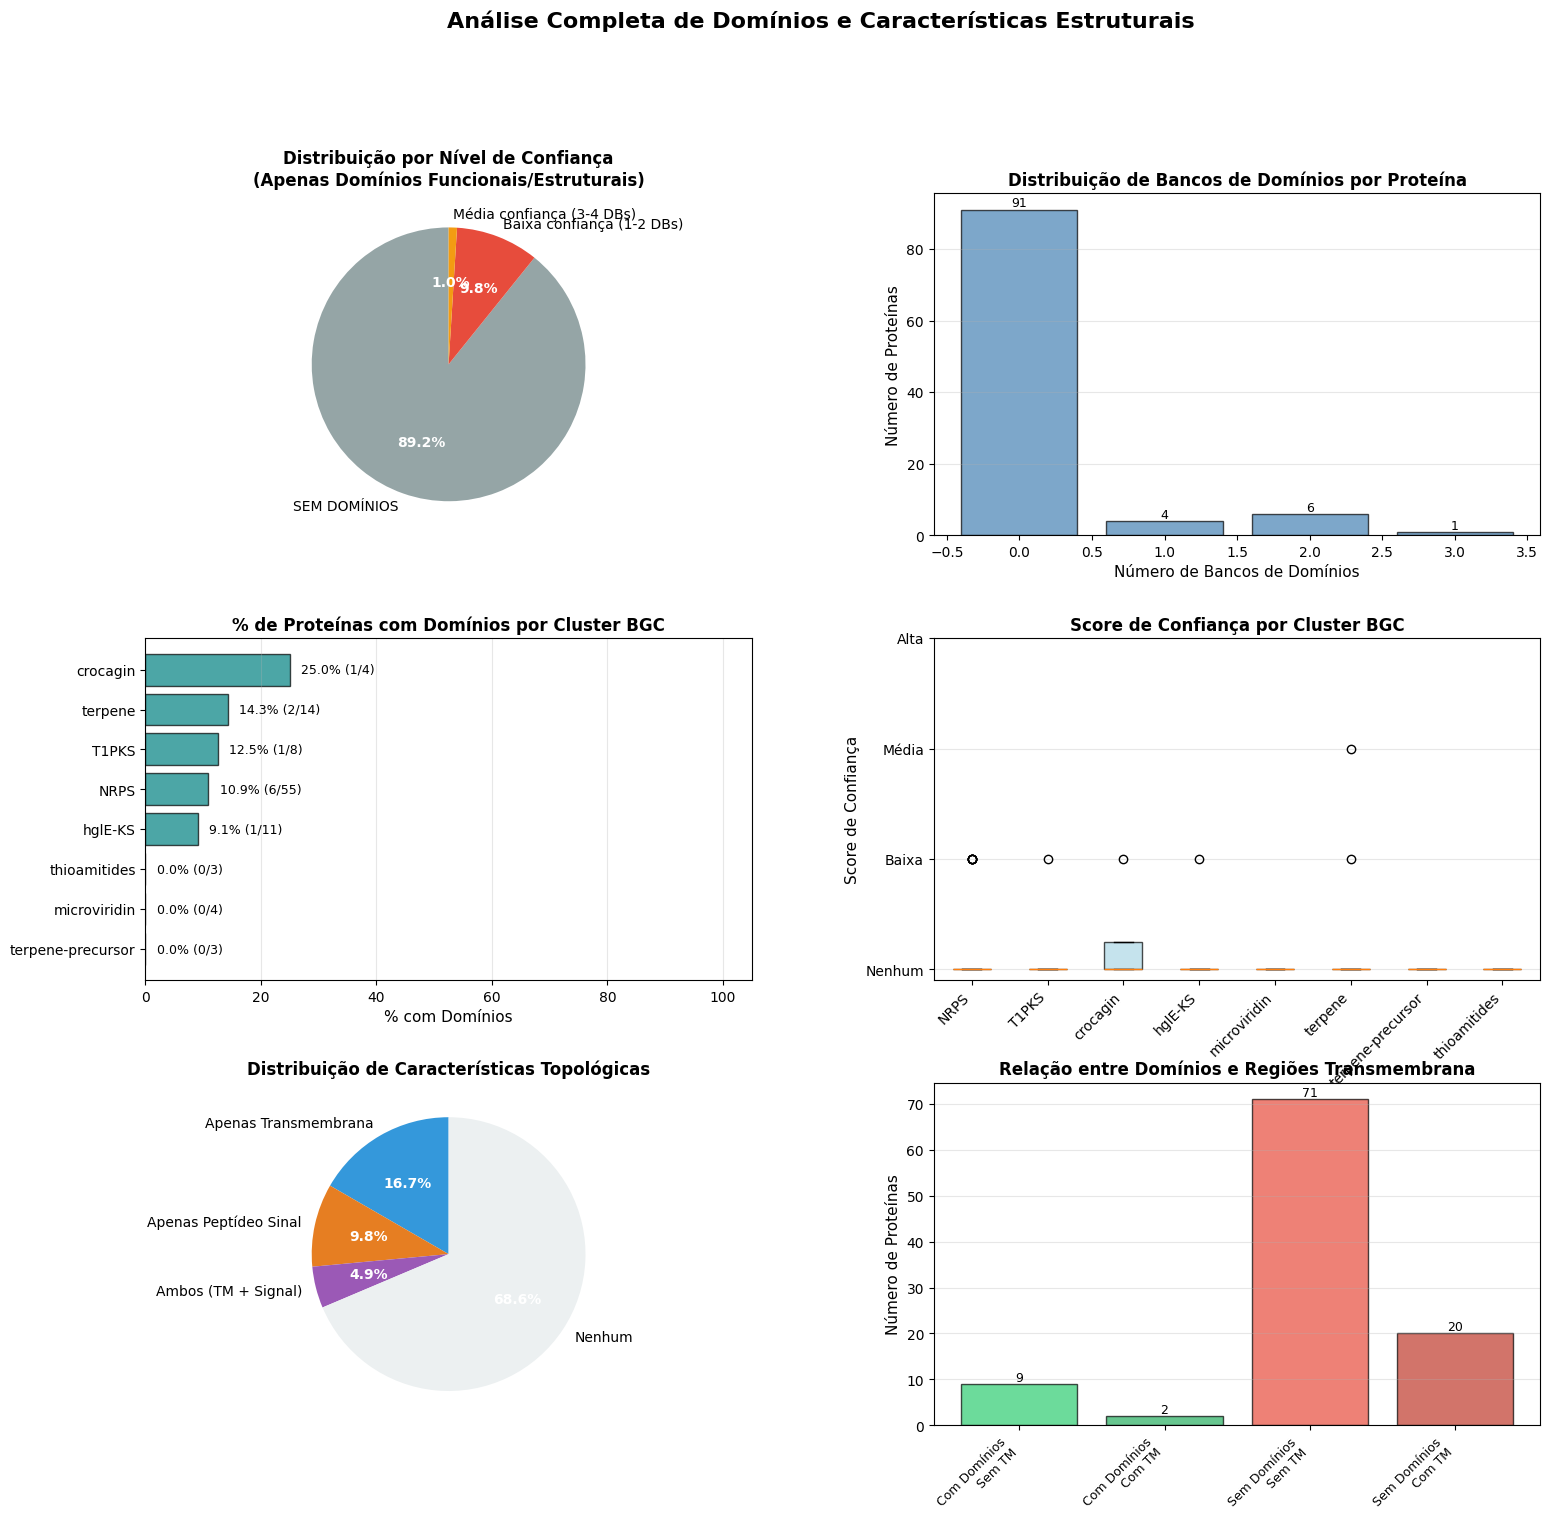

In [20]:
# Visualizações de domínios
import matplotlib.pyplot as plt
import seaborn as sns

if len(df) > 0 and 'Domain_Confidence' in df.columns:
    print("="*70)
    print("VISUALIZAÇÕES: ANÁLISE DE DOMÍNIOS EM PROTEÍNAS DE LÍCHEN")
    print("="*70)

    # Criar figura com 6 subplots (2 novas para topologia)
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])

    # ========== Subplot 1: Distribuição de confiança ==========
    confidence_data = df['Domain_Confidence'].value_counts()
    colors_map = {
        'Alta confiança (≥5 DBs)': '#2ecc71',
        'Média confiança (3-4 DBs)': '#f39c12',
        'Baixa confiança (1-2 DBs)': '#e74c3c',
        'SEM DOMÍNIOS': '#95a5a6'
    }
    plot_colors = [colors_map.get(x, 'gray') for x in confidence_data.index]

    wedges, texts, autotexts = ax1.pie(
        confidence_data.values,
        labels=confidence_data.index,
        autopct='%1.1f%%',
        colors=plot_colors,
        startangle=90
    )
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    ax1.set_title('Distribuição por Nível de Confiança\n(Apenas Domínios Funcionais/Estruturais)',
                  fontsize=12, fontweight='bold')

    # ========== Subplot 2: Número de bancos por sequência ==========
    db_dist = df['Domain_Num_Databases'].value_counts().sort_index()
    bars = ax2.bar(db_dist.index, db_dist.values, color='steelblue', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Número de Bancos de Domínios', fontsize=11)
    ax2.set_ylabel('Número de Proteínas', fontsize=11)
    ax2.set_title('Distribuição de Bancos de Domínios por Proteína', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)

    # Adicionar valores no topo das barras
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

    # ========== Subplot 3: Domínios por cluster BGC ==========
    cluster_dom = []
    for cluster in df['BGC_Cluster_Type'].unique():
        with_dom = len(df[(df['BGC_Cluster_Type'] == cluster) & (df['Domain_Num_Databases'] > 0)])
        total = len(df[df['BGC_Cluster_Type'] == cluster])
        pct = (with_dom / total * 100) if total > 0 else 0
        cluster_dom.append({'Cluster': cluster, 'Pct': pct, 'Count': with_dom, 'Total': total})

    df_cluster_dom = pd.DataFrame(cluster_dom).sort_values('Pct', ascending=True)
    bars = ax3.barh(range(len(df_cluster_dom)), df_cluster_dom['Pct'],
                    color='teal', alpha=0.7, edgecolor='black')
    ax3.set_yticks(range(len(df_cluster_dom)))
    ax3.set_yticklabels(df_cluster_dom['Cluster'], fontsize=10)
    ax3.set_xlabel('% com Domínios', fontsize=11)
    ax3.set_title('% de Proteínas com Domínios por Cluster BGC', fontsize=12, fontweight='bold')
    ax3.set_xlim(0, 105)
    ax3.grid(axis='x', alpha=0.3)

    # Adicionar valores nas barras
    for i, (idx, row) in enumerate(df_cluster_dom.iterrows()):
        ax3.text(row['Pct'] + 2, i, f"{row['Pct']:.1f}% ({row['Count']}/{row['Total']})",
                va='center', fontsize=9)

    # ========== Subplot 4: Boxplot de confiança por cluster ==========
    confidence_map = {
        'Alta confiança (≥5 DBs)': 3,
        'Média confiança (3-4 DBs)': 2,
        'Baixa confiança (1-2 DBs)': 1,
        'SEM DOMÍNIOS': 0
    }

    df['Confidence_Score'] = df['Domain_Confidence'].map(confidence_map)

    plot_data = []
    for cluster in sorted(df['BGC_Cluster_Type'].unique()):
        cluster_data = df[df['BGC_Cluster_Type'] == cluster]
        plot_data.append({
            'Cluster': cluster,
            'Score': cluster_data['Confidence_Score'].values
        })

    cluster_names = [d['Cluster'] for d in plot_data]
    scores = [d['Score'] for d in plot_data]

    bp = ax4.boxplot(scores, labels=cluster_names, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

    ax4.set_ylabel('Score de Confiança', fontsize=11)
    ax4.set_title('Score de Confiança por Cluster BGC', fontsize=12, fontweight='bold')
    ax4.set_yticks([0, 1, 2, 3])
    ax4.set_yticklabels(['Nenhum', 'Baixa', 'Média', 'Alta'])
    ax4.grid(axis='y', alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # ========== Subplot 5: NOVO - Características Topológicas ==========
    if 'Has_Transmembrane' in df.columns and 'Has_Signal_Peptide' in df.columns:
        topology_data = {
            'Apenas Transmembrana': ((df['Has_Transmembrane']) & (~df['Has_Signal_Peptide'])).sum(),
            'Apenas Peptídeo Sinal': ((~df['Has_Transmembrane']) & (df['Has_Signal_Peptide'])).sum(),
            'Ambos (TM + Signal)': ((df['Has_Transmembrane']) & (df['Has_Signal_Peptide'])).sum(),
            'Nenhum': ((~df['Has_Transmembrane']) & (~df['Has_Signal_Peptide'])).sum()
        }

        colors_topo = ['#3498db', '#e67e22', '#9b59b6', '#ecf0f1']
        wedges, texts, autotexts = ax5.pie(
            topology_data.values(),
            labels=topology_data.keys(),
            autopct='%1.1f%%',
            colors=colors_topo,
            startangle=90
        )
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        ax5.set_title('Distribuição de Características Topológicas', fontsize=12, fontweight='bold')
    else:
        ax5.text(0.5, 0.5, 'Dados topológicos\nnão disponíveis',
                ha='center', va='center', fontsize=12, transform=ax5.transAxes)
        ax5.axis('off')

    # ========== Subplot 6: NOVO - Domínios vs Topologia ==========
    if 'Has_Transmembrane' in df.columns:
        categories = ['Com Domínios\nSem TM', 'Com Domínios\nCom TM',
                     'Sem Domínios\nSem TM', 'Sem Domínios\nCom TM']

        counts = [
            len(df[(df['Domain_Num_Databases'] > 0) & (~df['Has_Transmembrane'])]),
            len(df[(df['Domain_Num_Databases'] > 0) & (df['Has_Transmembrane'])]),
            len(df[(df['Domain_Num_Databases'] == 0) & (~df['Has_Transmembrane'])]),
            len(df[(df['Domain_Num_Databases'] == 0) & (df['Has_Transmembrane'])])
        ]

        colors_combo = ['#2ecc71', '#27ae60', '#e74c3c', '#c0392b']
        bars = ax6.bar(categories, counts, color=colors_combo, alpha=0.7, edgecolor='black')
        ax6.set_ylabel('Número de Proteínas', fontsize=11)
        ax6.set_title('Relação entre Domínios e Regiões Transmembrana', fontsize=12, fontweight='bold')
        ax6.grid(axis='y', alpha=0.3)
        plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=9)

        # Adicionar valores
        for bar in bars:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)
    else:
        ax6.text(0.5, 0.5, 'Dados topológicos\nnão disponíveis',
                ha='center', va='center', fontsize=12, transform=ax6.transAxes)
        ax6.axis('off')

    # Título geral
    fig.suptitle('Análise Completa de Domínios e Características Estruturais',
                 fontsize=16, fontweight='bold', y=0.995)

    plt.savefig('outputs/domain_analysis_complete.png', dpi=300, bbox_inches='tight')
    print("✅ Gráficos salvos em: outputs/domain_analysis_complete.png\n")
    plt.show()

else:
    print("❌ Dados insuficientes para visualização")
    print("   Execute a célula de classificação por confiança primeiro.")

### 4.5 Relatório Final: Proteínas de Líchen com Domínios Identificados

Gerar relatório detalhado das anotações de domínios encontradas.

In [21]:
# Relatório final detalhado
if len(df) > 0 and 'Domain_Confidence' in df.columns:
    print("="*70)
    print("RELATÓRIO FINAL: DOMÍNIOS EM PROTEÍNAS HIPOTÉTICAS DE LÍCHEN")
    print("="*70)

    report_file = "outputs/relatorio_dominios_lichen.txt"

    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("="*70 + "\n")
        f.write("ANÁLISE DE DOMÍNIOS CONSERVADOS E CARACTERÍSTICAS ESTRUTURAIS\n")
        f.write("Dataset: Proteínas Hipotéticas de Líquen\n")
        f.write("(Simbiose Fungi-Alga)\n")
        f.write("Baseado em: InterProScan (Todos os bancos disponíveis)\n")
        f.write("="*70 + "\n\n")

        f.write("RESUMO EXECUTIVO\n")
        f.write("-"*70 + "\n")
        f.write(f"Total de proteínas analisadas: {len(df)}\n\n")

        # Domínios
        with_dom = len(df[df['Domain_Num_Databases'] > 0])
        f.write("DOMÍNIOS FUNCIONAIS/ESTRUTURAIS:\n")
        f.write(f"  Proteínas com domínios identificados: {with_dom} ({with_dom/len(df)*100:.1f}%)\n")
        f.write(f"  Proteínas sem domínios: {len(df) - with_dom} ({(len(df) - with_dom)/len(df)*100:.1f}%)\n\n")

        # Topologia (se disponível)
        if 'Has_Transmembrane' in df.columns and 'Has_Signal_Peptide' in df.columns:
            tm_count = df['Has_Transmembrane'].sum()
            signal_count = df['Has_Signal_Peptide'].sum()
            both_count = (df['Has_Transmembrane'] & df['Has_Signal_Peptide']).sum()

            f.write("CARACTERÍSTICAS TOPOLÓGICAS:\n")
            f.write(f"  Proteínas com regiões transmembrana: {tm_count} ({tm_count/len(df)*100:.1f}%)\n")
            f.write(f"  Proteínas com peptídeo sinal: {signal_count} ({signal_count/len(df)*100:.1f}%)\n")
            f.write(f"  Proteínas com ambos (TM + Signal): {both_count} ({both_count/len(df)*100:.1f}%)\n\n")

        f.write("\n" + "="*70 + "\n")
        f.write("CLASSIFICAÇÃO POR CONFIANÇA DE DOMÍNIOS\n")
        f.write("="*70 + "\n")
        f.write("Baseado no número de bancos de domínios que identificaram a proteína\n")
        f.write("-"*70 + "\n\n")

        confidence_order = [
            'Alta confiança (≥5 DBs)',
            'Média confiança (3-4 DBs)',
            'Baixa confiança (1-2 DBs)',
            'SEM DOMÍNIOS'
        ]

        for conf in confidence_order:
            count = len(df[df['Domain_Confidence'] == conf])
            if count > 0:
                percentage = count/len(df)*100
                f.write(f"{conf}: {count} proteínas ({percentage:.1f}%)\n")

        f.write("\n")

        f.write("="*70 + "\n")
        f.write("DISTRIBUIÇÃO POR TIPO DE CLUSTER BGC\n")
        f.write("="*70 + "\n\n")

        for cluster in sorted(df['BGC_Cluster_Type'].unique()):
            cluster_data = df[df['BGC_Cluster_Type'] == cluster]
            with_dom_cluster = len(cluster_data[cluster_data['Domain_Num_Databases'] > 0])

            f.write(f"{cluster}:\n")
            f.write(f"  Total de proteínas: {len(cluster_data)}\n")
            f.write(f"  Com domínios: {with_dom_cluster} ({with_dom_cluster/len(cluster_data)*100:.1f}%)\n")
            f.write(f"  Sem domínios: {len(cluster_data) - with_dom_cluster} ({(len(cluster_data) - with_dom_cluster)/len(cluster_data)*100:.1f}%)\n\n")

            f.write(f"  Distribuição por confiança:\n")
            for conf in confidence_order:
                count = len(cluster_data[cluster_data['Domain_Confidence'] == conf])
                if count > 0:
                    f.write(f"    {conf}: {count} ({count/len(cluster_data)*100:.1f}%)\n")

            # Topologia por cluster
            if 'Has_Transmembrane' in df.columns:
                tm_cluster = cluster_data['Has_Transmembrane'].sum()
                signal_cluster = cluster_data['Has_Signal_Peptide'].sum()
                f.write(f"\n  Características topológicas:\n")
                f.write(f"    Com regiões transmembrana: {tm_cluster} ({tm_cluster/len(cluster_data)*100:.1f}%)\n")
                f.write(f"    Com peptídeo sinal: {signal_cluster} ({signal_cluster/len(cluster_data)*100:.1f}%)\n")

            f.write("\n")

        f.write("="*70 + "\n")
        f.write("TOP 20 PROTEÍNAS MELHOR ANOTADAS\n")
        f.write("="*70 + "\n")
        f.write("Ordenadas por: número de bancos de domínios, depois número de domínios\n")
        f.write("-"*70 + "\n\n")

        df_sorted = df[df['Domain_Num_Databases'] > 0].sort_values(
            ['Domain_Num_Databases', 'Domain_Count'],
            ascending=False
        ).head(20)

        for idx, (_, row) in enumerate(df_sorted.iterrows(), 1):
            f.write(f"{idx}. {row['FASTA_ID']}\n")
            f.write(f"   BGC: {row['BGC_Cluster_Type']} (Região {row['BGC_Region']})\n")
            f.write(f"   Número de bancos: {row['Domain_Num_Databases']}\n")
            f.write(f"   Bancos: {row['Domain_Databases']}\n")
            f.write(f"   Número de domínios: {row['Domain_Count']}\n")
            f.write(f"   Confiança: {row['Domain_Confidence']}\n")

            # Características topológicas
            if 'Has_Transmembrane' in df.columns:
                features = []
                if row['Has_Transmembrane']:
                    features.append("Transmembrana")
                if row['Has_Signal_Peptide']:
                    features.append("Peptídeo sinal")
                if features:
                    f.write(f"   Topologia: {', '.join(features)}\n")

            f.write(f"   Domínios encontrados: {row['Domain_Names']}\n")
            f.write(f"   Sequência (início): {row['Translation'][:80]}...\n\n")

        # Seção de proteínas interessantes (alta confiança + características especiais)
        f.write("\n" + "="*70 + "\n")
        f.write("PROTEÍNAS DE INTERESSE ESPECIAL\n")
        f.write("="*70 + "\n")
        f.write("(Alta confiança + características topológicas únicas)\n")
        f.write("-"*70 + "\n\n")

        if 'Has_Transmembrane' in df.columns:
            # Alta confiança + transmembrana + peptídeo sinal
            special = df[
                (df['Domain_Num_Databases'] >= 3) &
                (df['Has_Transmembrane']) &
                (df['Has_Signal_Peptide'])
            ].sort_values('Domain_Num_Databases', ascending=False).head(10)

            if len(special) > 0:
                f.write("Proteínas com domínios + transmembrana + peptídeo sinal:\n")
                f.write("(Possíveis proteínas de membrana secretadas ou ancoradas)\n\n")
                for idx, (_, row) in enumerate(special.iterrows(), 1):
                    f.write(f"{idx}. {row['FASTA_ID']}\n")
                    f.write(f"   BGC: {row['BGC_Cluster_Type']}\n")
                    f.write(f"   Bancos: {row['Domain_Num_Databases']} | Domínios: {row['Domain_Count']}\n")
                    f.write(f"   Domínios: {row['Domain_Names'][:100]}...\n\n")
            else:
                f.write("Nenhuma proteína encontrada com essa combinação.\n\n")

        f.write("\n" + "="*70 + "\n")
        f.write("NOTAS INTERPRETATIVAS\n")
        f.write("="*70 + "\n\n")

        f.write("SOBRE DOMÍNIOS:\n")
        f.write("-"*70 + "\n")
        f.write("• Alta confiança (≥5 bancos): Domínios bem estabelecidos, função previsível\n")
        f.write("• Média confiança (3-4 bancos): Domínios prováveis, requerem validação\n")
        f.write("• Baixa confiança (1-2 bancos): Domínios possíveis, alta incerteza\n")
        f.write("• Sem domínios: Proteínas específicas de líquen OU anotação falhou\n\n")

        f.write("SOBRE TOPOLOGIA:\n")
        f.write("-"*70 + "\n")
        f.write("• Transmembrana: Proteínas de membrana (transportadores, receptores, canais)\n")
        f.write("• Peptídeo sinal: Proteínas secretadas ou direcionadas para compartimentos\n")
        f.write("• Ambos: Proteínas ancoradas na membrana com porção extracelular\n\n")

        f.write("CONTEXTO BIOLÓGICO - LIQUENS:\n")
        f.write("-"*70 + "\n")
        f.write("Características esperadas em proteínas de líquen:\n")
        f.write("1. Domínios de adesão fungi-alga (lectinas, CAD, integrinas-like)\n")
        f.write("2. Proteínas de matriz extracelular modificada\n")
        f.write("3. Proteínas de sinalização específicas da simbiose\n")
        f.write("4. Enzimas de degradação de parede celular alteradas\n")
        f.write("5. Proteínas de defesa/imunidade específicas\n")
        f.write("6. Transportadores especializados para troca de metabólitos\n\n")

        f.write("="*70 + "\n")
        f.write(f"Relatório gerado em: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("="*70 + "\n")

    print(f"✅ Relatório salvo em: {report_file}")

    # Resumo no console
    print(f"\n📊 RESUMO EXECUTIVO:")
    print(f"{'='*70}")
    print(f"Total de proteínas: {len(df)}")
    print(f"Com domínios: {with_dom} ({with_dom/len(df)*100:.1f}%)")

    if 'Has_Transmembrane' in df.columns:
        tm_count = df['Has_Transmembrane'].sum()
        signal_count = df['Has_Signal_Peptide'].sum()
        print(f"Com regiões transmembrana: {tm_count} ({tm_count/len(df)*100:.1f}%)")
        print(f"Com peptídeo sinal: {signal_count} ({signal_count/len(df)*100:.1f}%)")

    print(f"\n🔐 DISTRIBUIÇÃO DE CONFIANÇA:")
    for conf in confidence_order:
        count = len(df[df['Domain_Confidence'] == conf])
        if count > 0:
            print(f"   {conf}: {count} ({count/len(df)*100:.1f}%)")

    print(f"\n{'='*70}")

else:
    print("❌ Execute as análises de domínios primeiro")

RELATÓRIO FINAL: DOMÍNIOS EM PROTEÍNAS HIPOTÉTICAS DE LÍCHEN
✅ Relatório salvo em: outputs/relatorio_dominios_lichen.txt

📊 RESUMO EXECUTIVO:
Total de proteínas: 102
Com domínios: 11 (10.8%)
Com regiões transmembrana: 22 (21.6%)
Com peptídeo sinal: 15 (14.7%)

🔐 DISTRIBUIÇÃO DE CONFIANÇA:
   Média confiança (3-4 DBs): 1 (1.0%)
   Baixa confiança (1-2 DBs): 10 (9.8%)
   SEM DOMÍNIOS: 91 (89.2%)



In [28]:
# Teste com ABC Transporter - domínio muito conservado
test_sequence_abc = "MKLSKNQNLLDIYGVTGSGKSTLLRCVNLIEKDSGRVTVDGKPLWNTDRNILRRVSLIIGQHIGELNPPGTIRENIIAGLRVAKDEARRVAQVNMLFATANNVTFDQIALDHFTVDQPGERTVVGERGVVLSGGQRQRVSIARAIAQHPKILILDEATSSLDIETERVVEGLVDQLREGRTIIVIAHRLSTVRDGDRILVLNQGKFVEQGPHGELLSKKGVYFQLFTKKPNIVEKIEEGPQDDIMQSRWNFAGAGKL"

print("\n" + "="*70)
print("TESTE: ABC Transporter (alta confiança esperada)")
print("="*70)

domains = search_all_databases(test_sequence_abc, "ABC_TRANSPORTER_TEST", timeout=6000)
print(f"\n\nTotal de domínios encontrados: {len(domains)}")

if domains:
    df_test = pd.DataFrame(domains)
    print(f"\nBancos que encontraram domínios:")
    for db in df_test['database'].unique():
        count = len(df_test[df_test['database'] == db])
        print(f"  - {db}: {count} anotações")

    DOMAIN_DATABASES = ['PFAM', 'SMART', 'PROSITE', 'PANTHER', 'PRINTS', 'PIRSF',
                        'PIRSR', 'HAMAP', 'TIGERFAMS', 'SFLD', 'CDD', 'GENE3D', 'SUPERFAMILY']
    df_domains_only = df_test[df_test['database'].isin(DOMAIN_DATABASES)]

    print(f"\nBancos de DOMÍNIOS:")
    num_domain_dbs = df_domains_only['database'].nunique()
    print(f"  Total: {num_domain_dbs} bancos diferentes")
    print(f"  Bancos: {', '.join(sorted(df_domains_only['database'].unique()))}")

    if num_domain_dbs >= 5:
        print(f"\n  🔐 ALTA CONFIANÇA (≥5 DBs)! ✅")


TESTE: ABC Transporter (alta confiança esperada)
   Buscando em todos os bancos... ⏱ [Timeout]

Total de domínios encontrados: 0
